**Ryan Mogauro**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 5: K-Means

In [64]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans2

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [12,5]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-64-51f776728b97>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
<ipython-input-64-51f776728b97>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


 

## Task 1:  Import and explore the data

We are going to be using K-Means to explore the flea beetle dataset which contains measurements of three different types of beetles.

**Dataset Variables**      
**species:** Ch. concinna, Ch. heptapotamica, and Ch. heikertingeri     
**tars1:** width of the first joint of the first tarsus in microns    
**tars2:** width of the second joint of the first tarsus in microns    
**head:** the maximal width of the head between the external edges of the eyes in 0.01 mm    
**aede1:** the maximal width of the aedeagus in the fore-part in microns     
**aede2:** the front angle of the aedeagus (1 unit = 7.5 degrees)    
**aede3:** the aedeagus width from the side in microns    
 
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from `data/flea.csv`.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, Check the data
    1. Print the shape of the data
    2. Print first 5 rows of the data using head.
3. Use [Dataframe.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) to replace the values in the species column with integers values and assign the result to a new dataframe.
    1. Use the dictionary: `species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}`
    2. Use the inplace parameter to replace the values in the dataframe.
    4. Print the first 5 items of the updated dataframe to make sure that the replace worked correctly
2. Graph a scatterplot of the `tars1` and `aede3` columns using plt.scatter
    1. Scatter Parameters
        1. Graph `tars1` on the x axis and `aede3` on the y axis
        3. Use the `species` column of your data for the color with a black edgecolor
        4. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
    3. Have a title, and axis labels.

(74, 8)
   id  tars1  tars2  head  aede1  aede2  aede3    species
0   1    191    131    53    150     15    104  Concinna 
1   2    185    134    50    147     13    105  Concinna 
2   3    200    137    52    144     14    102  Concinna 
3   4    173    127    50    144     16     97  Concinna 
4   5    171    118    49    153     13    106  Concinna 
    id  tars1  tars2  head  aede1  aede2  aede3  species
0    1    191    131    53    150     15    104        0
1    2    185    134    50    147     13    105        0
2    3    200    137    52    144     14    102        0
3    4    173    127    50    144     16     97        0
4    5    171    118    49    153     13    106        0
..  ..    ...    ...   ...    ...    ...    ...      ...
69  70    187    120    47    121     15     86        2
70  71    210    119    50    128     14     68        2
71  72    196    114    51    129     14     86        2
72  73    195    110    49    124     13     89        2
73  74    187    

<ipython-input-74-35d2c1729f25>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')


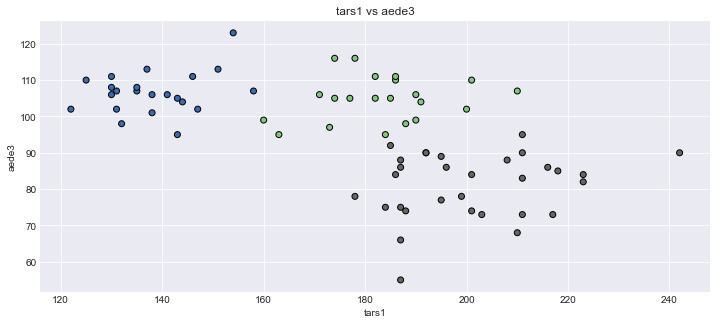

In [74]:
fleadata = pd.read_csv("data/flea.csv")
print(fleadata.shape)
print(fleadata[:5])
species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}

fleadata.replace(species_dict, inplace=True)
print(fleadata)

plt.scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')
plt.xlabel("tars1")
plt.ylabel("aede3")
plt.title("tars1 vs aede3")
plt.show()


## Task 2: K-Means

### Part 1

1. Use the [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) documentation to find out how to calculate K-Means on for the columns `tars1` and `aede3` using  kmeans2 
    1. Use 3 clusters and set the method of initialization to random. 
    1. Make sure to convert the data to floats, with `.astype('float')` before running the analysis.
2. Calculate how well a data series is fitted to the clusters and print the result
    1. For each datapoint calculate the euclidean distance between that datapoint and its cluster
    2. Sum the euclidean distances
3. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph 'tars1' on the x axis and 'aede3' on the y axis
    3. Have a title for each subplot, and axis labels.
    1. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the `species` column of your data for the color with a black edgecolor
    1. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled.  

[13.54852 10.35514 20.44017 15.14817 19.26607 28.01429 11.70635  7.38341
 14.77096 27.42332 17.02213 10.12496 18.86015 11.58983  4.25278 14.47133
 15.31232 18.22584 30.28107 14.00478 14.58931 29.07201 14.53835 17.45644
 24.14916  7.92006 15.87164  9.24416 10.79562 15.27327 10.57871 10.6515
  6.0528  13.99026 13.72125 26.09075 13.11141  8.74903 16.99733 10.83764
 23.57194 12.68858 11.37781 25.15004 22.46808 16.69098 45.95624 26.19792
 17.16923 20.35274 26.02868 13.44314 10.61383 15.20957 19.68974 10.7767
 13.42633  8.40556 13.12011 16.40344 17.63909 23.52779 16.5931  17.21052
 21.2248  24.77594 24.27082 32.22715 17.9104  18.96708 20.16725 16.45939
 19.62163 22.60407]
Total distance = 1273.8319973822863


<ipython-input-83-fbc9cfb44fd5>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[0].scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')


Text(0, 0.5, 'aede3')

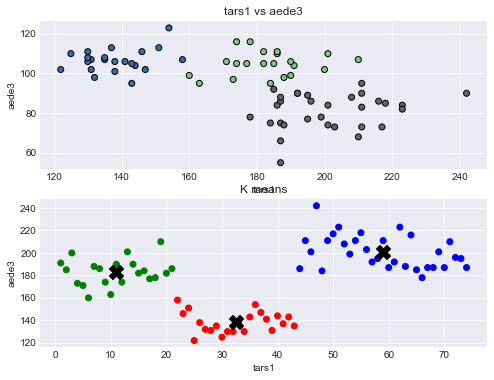

In [83]:
floated_data = fleadata.astype('float').to_numpy()
centroid, label = kmeans2(floated_data, 3, minit='random')
distances = np.sqrt(np.sum((floated_data - centroid[label])**2, axis=1))
total_distance = np.sum(distances)
print(distances)
print("Total distance = " + str(total_distance))


fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the first subplot
axs[0].scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')
axs[0].set_title('tars1 vs aede3')
axs[0].set_xlabel('tars1')
axs[0].set_ylabel("aede3")

colors = ['red', 'green', 'blue']
point_colors = [colors[label] for label in label]

# Plot the data with different colors based on cluster label

# Plot the centroids with black color


axs[1].scatter(floated_data[:, 0], floated_data[:, 1], c=point_colors)
axs[1].scatter(centroid[:, 0], centroid[:, 1], c='black', marker='X', s=200)
axs[1].set_title('K means')
axs[1].set_xlabel('tars1')
axs[1].set_ylabel("aede3")






## Task 3: Analysis

1. Write code that calculates the kmeans2 50 times
2. Save the centroids, labels and how well a data series is fitted to the clusters for each test.  

In [86]:
sum_list = []
k_mean_list = []
label_list = []


for i in range(50):
    k_mean,label = kmeans2(floated_data,3)

    k_mean_list.append(k_mean)
    label_list.append(label)

    sum = 0

    for i in range(floated_data.shape[0]):
        sum += (floated_data[i][0] - k_mean[label[i]][0])**2+(floated_data[i][1] - k_mean[label[i]][1])**2
    
    sum_list.append(sum)

/Users/ryan/opt/anaconda3/lib/python3.8/site-packages/scipy/cluster/vq.py:575: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


3. Graph a plot with 3 subplots
    1. The first plot should graph Graph 'tars1' on the x axis and 'aede3' on the y axis with the original labels
    2. Using your above analysis the second plot should graph the results with the best kmeans fit using the saved labels and centroids from the above analysis.
    2. Using your above analysis the third plot should graph the results with the worst kmeans fit using the saved labels and centroids from the above analysis.
    4. For formatting, follow the instructions in Task 2.

<ipython-input-101-b6b643d24069>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[0].scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')


Text(0.5, 1.0, 'Worst k-means fit')

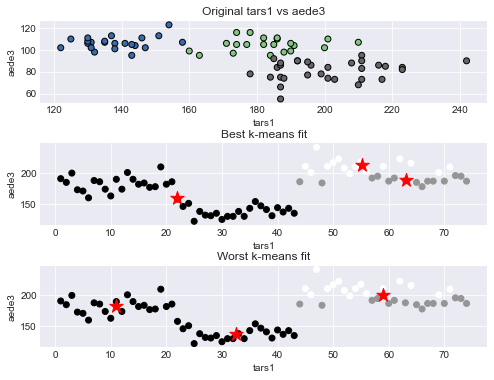

In [101]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

#PLOT 1
axs[0].scatter(fleadata["tars1"], fleadata["aede3"], c = fleadata['species'], cmap = plt.cm.get_cmap('Accent'), edgecolors='black')
axs[0].set_title('Original tars1 vs aede3')
axs[0].set_xlabel('tars1')
axs[0].set_ylabel("aede3")



#PLOT 2
best_fit_index = np.argmax(sum_list)
best_labels = label_list[best_fit_index]
best_centroids = k_mean_list[best_fit_index]

axs[1].scatter(floated_data[:, 0], floated_data[:, 1], c=best_labels)
axs[1].scatter(best_centroids[:, 0], best_centroids[:, 1], marker='*', s=200, c='r')
axs[1].set_xlabel('tars1')
axs[1].set_ylabel('aede3')
axs[1].set_title('Best k-means fit')

#PLOT 3
worst_fit_index = np.argmin(sum_list)
worst_labels = label_list[worst_fit_index]
worst_centroids = k_mean_list[worst_fit_index]

axs[2].scatter(floated_data[:, 0], floated_data[:, 1], c=best_labels)
axs[2].scatter(worst_centroids[:, 0], worst_centroids[:, 1], marker='*', s=200, c='r')
axs[2].set_xlabel('tars1')
axs[2].set_ylabel('aede3')
axs[2].set_title('Worst k-means fit')




#### Question 1: Why does kmeans produce different solutions?

#### Answer 1: Because the intial centroids are randomly assigned, each kmeans will have a different outcome. However, the clusters will likely look similar after kmeans, with similarly located centroids.